In [27]:
import pandas as pd
import random
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder as le, MinMaxScaler as mms, OneHotEncoder as ohe, StandardScaler as ss
from xgboost import XGBRegressor as xgb
from lightgbm import LGBMRegressor as lgbm

from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split, cross_val_score as cv, GridSearchCV

from scipy import stats

import warnings

warnings.filterwarnings('ignore')

In [28]:
train = pd.read_csv('./dts/train.csv')

In [29]:
train

,ID,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age,Calories_Burned
0,TRAIN_0000,26.0,105.6,107.0,5.0,9.0,154.3,Normal Weight,F,45,166.0
1,TRAIN_0001,7.0,103.3,88.0,6.0,6.0,224.9,Overweight,M,50,33.0
2,TRAIN_0002,7.0,103.3,86.0,6.0,3.0,218.3,Overweight,M,29,23.0
3,TRAIN_0003,17.0,104.0,99.0,5.0,6.0,147.7,Normal Weight,F,33,91.0
4,TRAIN_0004,9.0,102.7,88.0,5.0,10.0,169.8,Normal Weight,M,38,32.0
...,...,...,...,...,...,...,...,...,...,...,...
7495,TRAIN_7495,22.0,105.1,104.0,4.0,10.0,112.4,Normal Weight,F,75,151.0
7496,TRAIN_7496,20.0,105.3,104.0,5.0,8.0,147.7,Normal Weight,F,21,114.0
7497,TRAIN_7497,8.0,103.1,90.0,6.0,2.0,202.8,Overweight,M,57,41.0
7498,TRAIN_7498,12.0,104.4,97.0,5.0,9.0,167.6,Overweight,M,35,57.0


<Axes: >

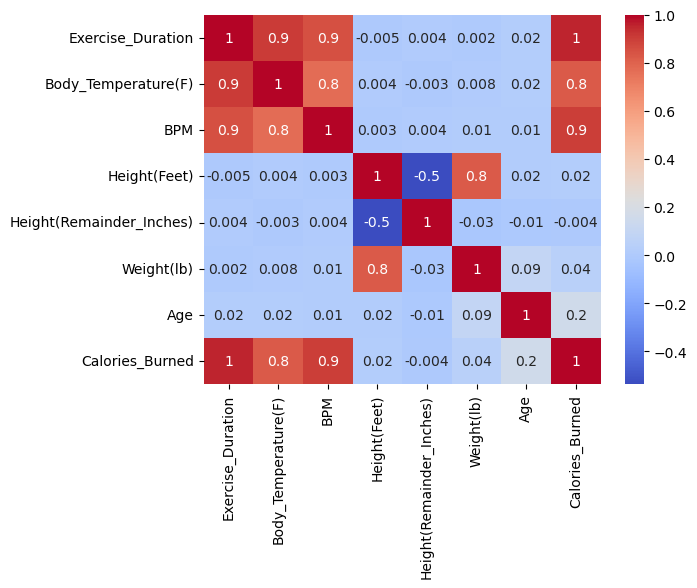

In [30]:
sns.heatmap(train.corr(), annot = True, fmt='.1g', cmap='coolwarm')

-0.9714503032538716 0.4390611495777552


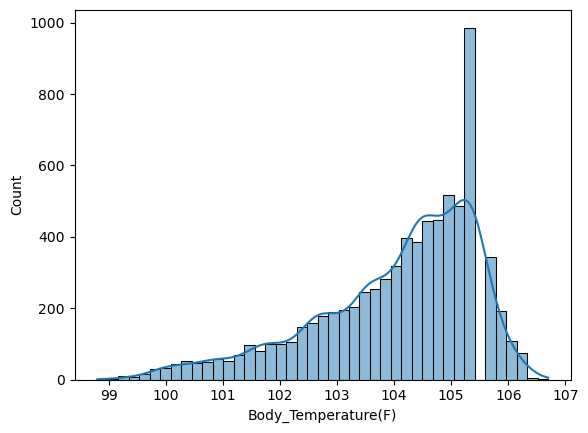

In [46]:
sns.histplot(train['Body_Temperature(F)'], kde=True)
print(stats.skew(train['Body_Temperature(F)']),stats.kurtosis(train['Body_Temperature(F)']))

# sns.histplot(train['Body_Temperature(F)2'])
# print(stats.skew(train['Body_Temperature(F)2']),stats.kurtosis(train['Body_Temperature(F)2']))

# sns.histplot(train['Body_Temperature(F)3'], kde=True)
# print(stats.skew(train['Body_Temperature(F)3']),stats.kurtosis(train['Body_Temperature(F)2']))

In [32]:
train['Body_Temperature(F)2']=np.log1p(train['Body_Temperature(F)'])

In [40]:
train['Body_Temperature(F)3']=stats.boxcox(train['Body_Temperature(F)'])[0]

<Axes: >

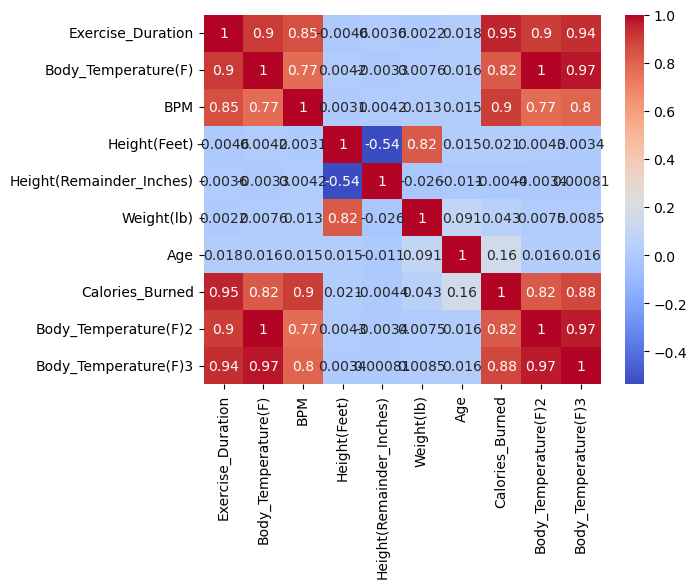

In [41]:
sns.heatmap(train.corr(), annot = True, cmap='coolwarm')

In [37]:
train

,ID,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age,Calories_Burned,Body_Temperature(F)2
0,TRAIN_0000,26.0,105.6,107.0,5.0,9.0,154.3,Normal Weight,F,45,166.0,4.669084
1,TRAIN_0001,7.0,103.3,88.0,6.0,6.0,224.9,Overweight,M,50,33.0,4.647271
2,TRAIN_0002,7.0,103.3,86.0,6.0,3.0,218.3,Overweight,M,29,23.0,4.647271
3,TRAIN_0003,17.0,104.0,99.0,5.0,6.0,147.7,Normal Weight,F,33,91.0,4.653960
4,TRAIN_0004,9.0,102.7,88.0,5.0,10.0,169.8,Normal Weight,M,38,32.0,4.641502
...,...,...,...,...,...,...,...,...,...,...,...,...
7495,TRAIN_7495,22.0,105.1,104.0,4.0,10.0,112.4,Normal Weight,F,75,151.0,4.664382
7496,TRAIN_7496,20.0,105.3,104.0,5.0,8.0,147.7,Normal Weight,F,21,114.0,4.666265
7497,TRAIN_7497,8.0,103.1,90.0,6.0,2.0,202.8,Overweight,M,57,41.0,4.645352
7498,TRAIN_7498,12.0,104.4,97.0,5.0,9.0,167.6,Overweight,M,35,57.0,4.657763


In [11]:
scaler = ss()
train_2 = pd.DataFrame(scaler.fit_transform(train_2), columns=train_2.columns)

In [15]:
train_2.describe()

,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Age,Calories_Burned
count,7.500000e+03,7.500000e+03,7.500000e+03,7.500000e+03,7.500000e+03,7.500000e+03,7.500000e+03,7.500000e+03
mean,-8.787045e-17,-2.158155e-15,5.314860e-16,-2.292685e-16,-3.221127e-17,8.052818e-16,-1.598721e-16,-9.616012e-17
std,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00
min,-1.735685e+00,-3.704527e+00,-2.764054e+00,-2.243519e+00,-1.634963e+00,-2.580959e+00,-1.340831e+00,-1.406932e+00
25%,-8.978373e-01,-5.192518e-01,-7.821398e-01,-4.469792e-01,-7.771050e-01,-7.944891e-01,-8.669557e-01,-8.656417e-01
50%,-5.998988e-02,2.593711e-01,-5.196092e-02,-4.469792e-01,8.075304e-02,-6.789144e-02,-2.153765e-01,-1.969893e-01
75%,8.975500e-01,7.548583e-01,7.825292e-01,1.349561e+00,9.386111e-01,7.938174e-01,7.916094e-01,7.741489e-01
max,1.735397e+00,1.887401e+00,3.390311e+00,3.146101e+00,1.796469e+00,3.772267e+00,2.154002e+00,3.353237e+00


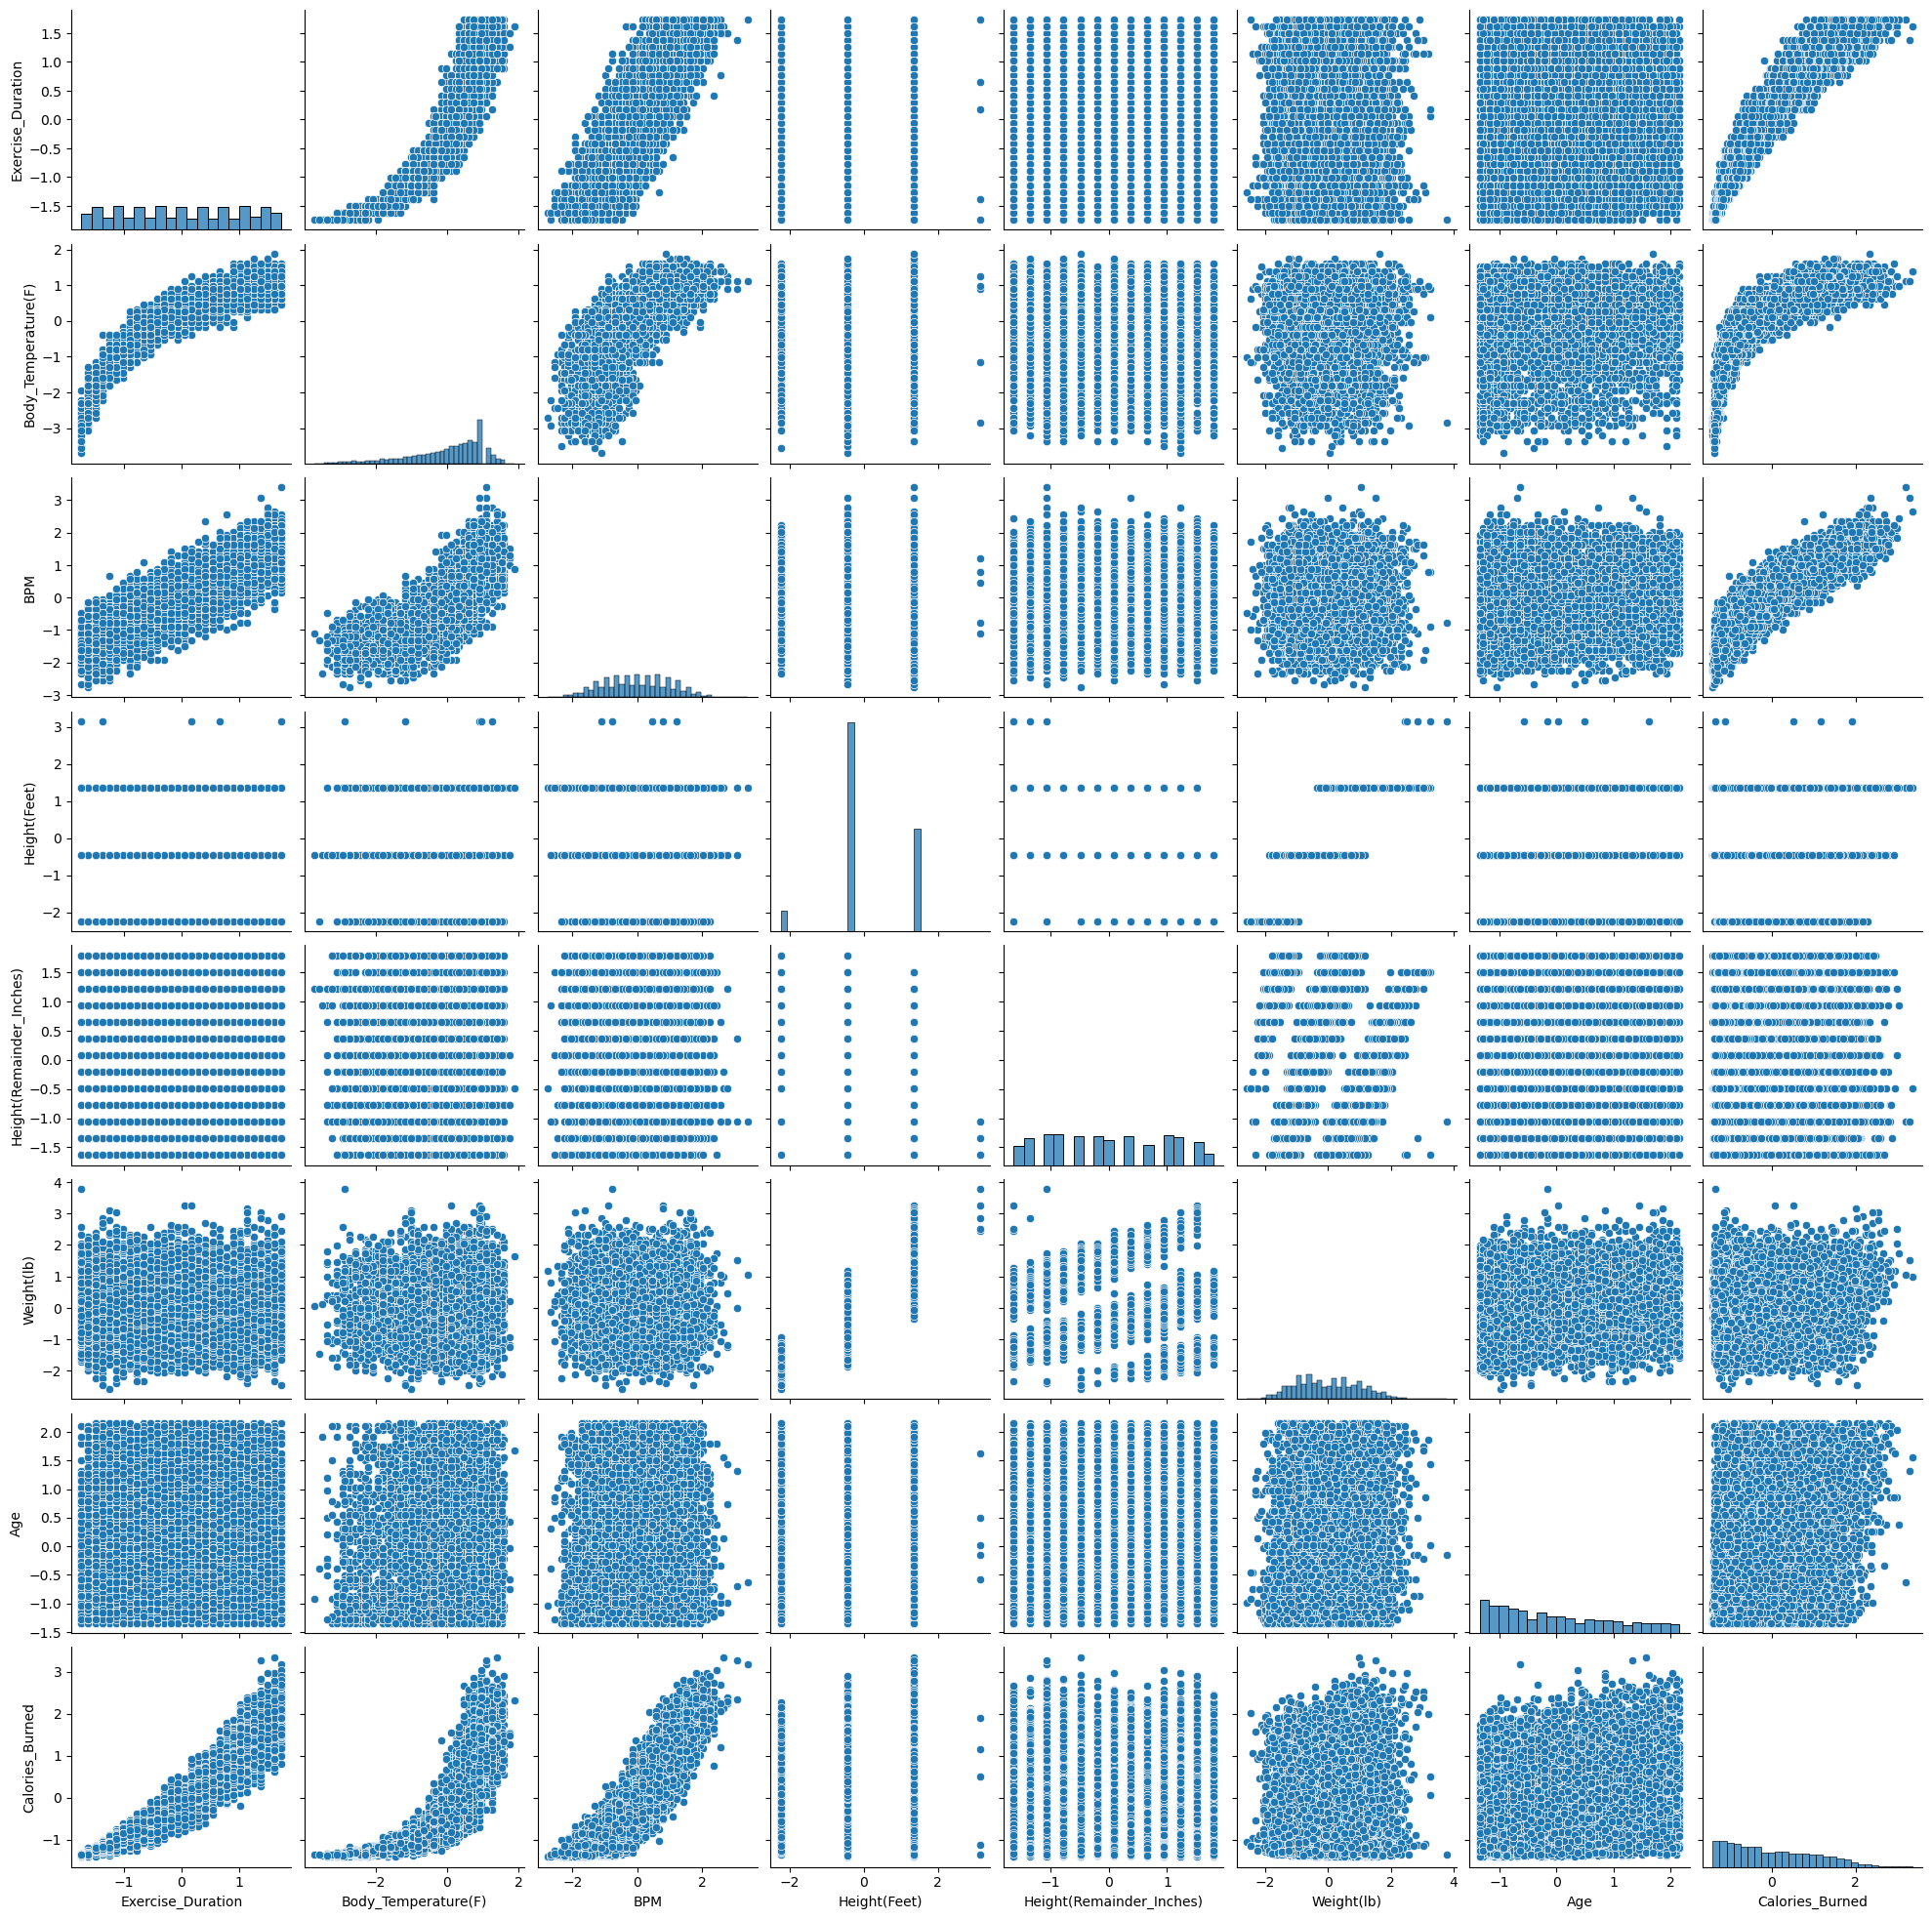

In [12]:
sns.pairplot(train_2)